In [2]:
# Load libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('CKD_clean.csv')

# Part 1.
### Risk Factors for CKD

Let's look at the distributions of values for patients with and without CKD.

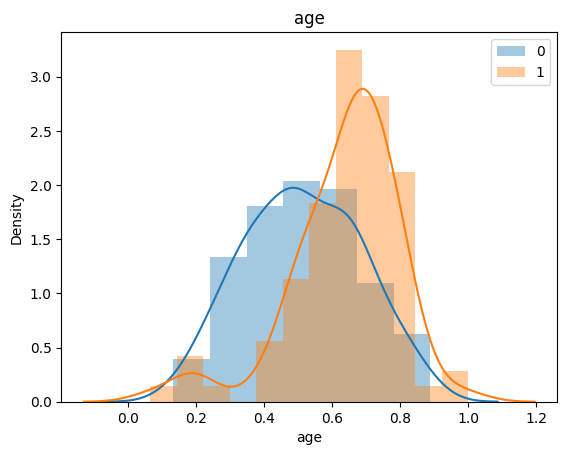

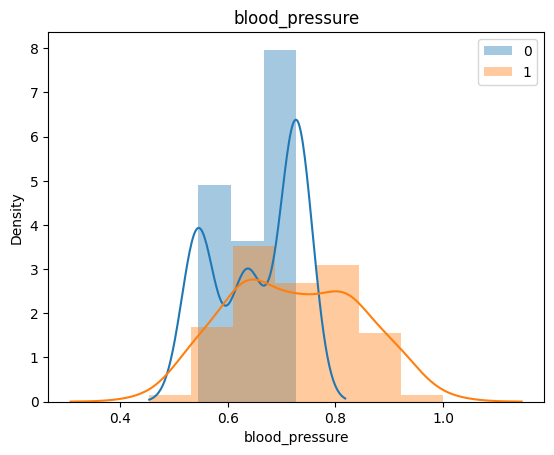

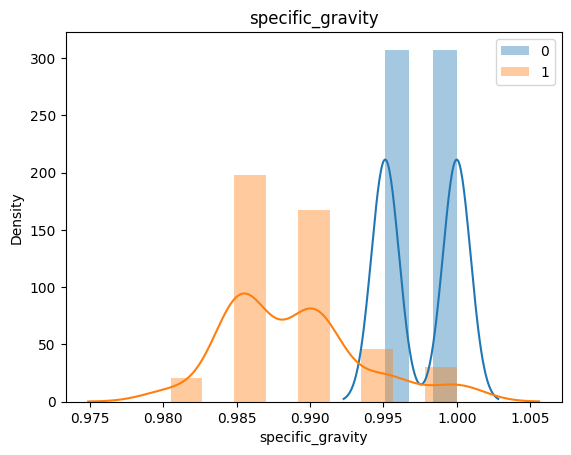

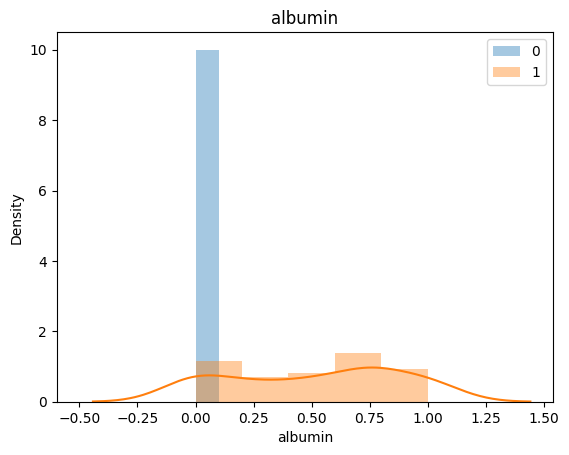

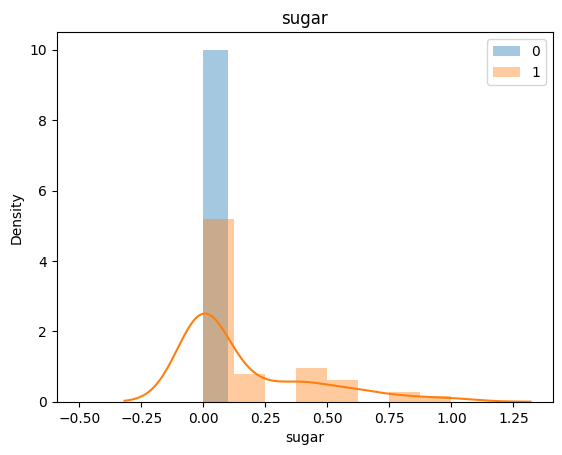

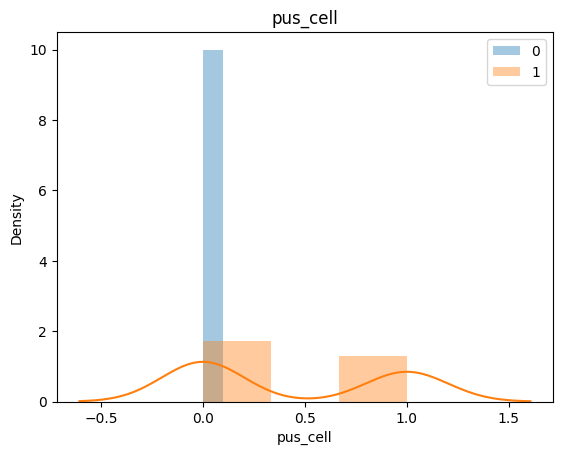

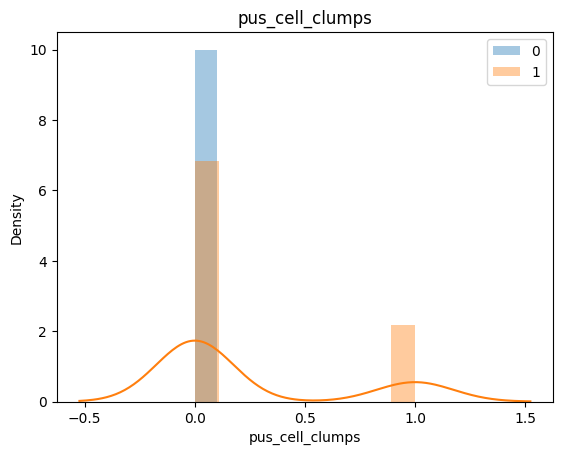

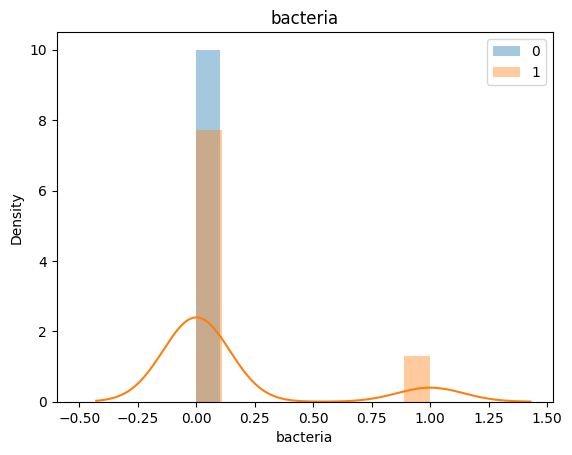

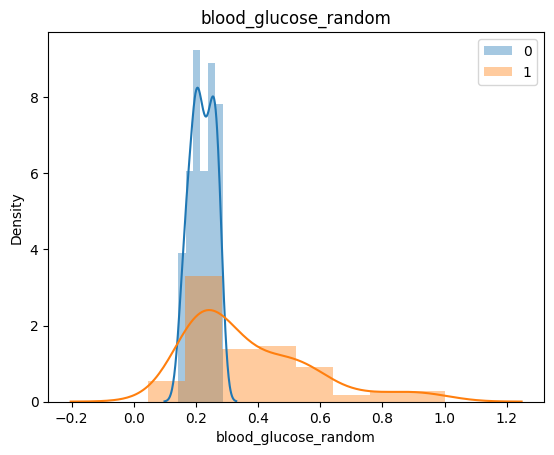

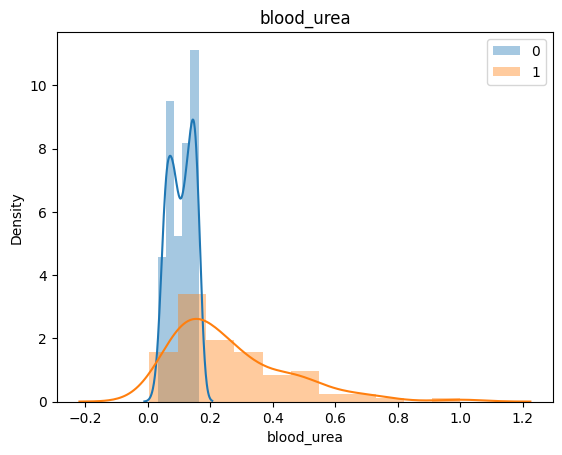

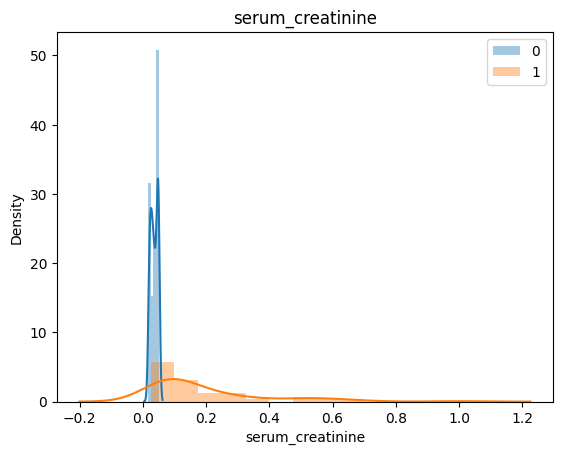

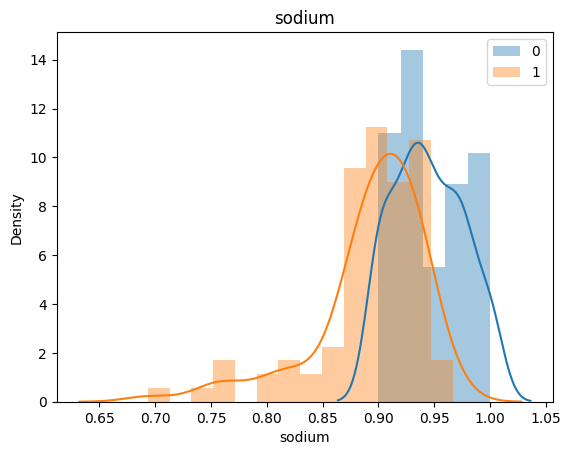

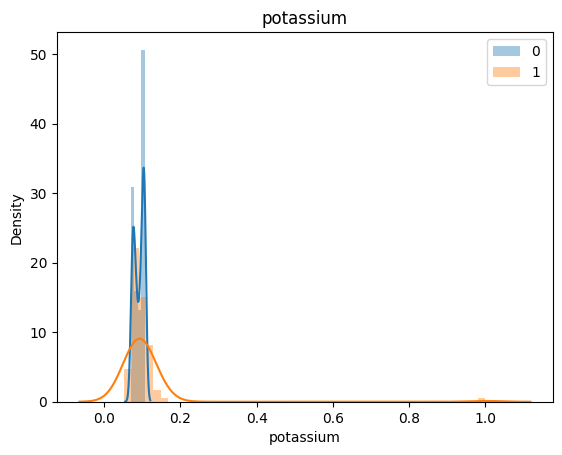

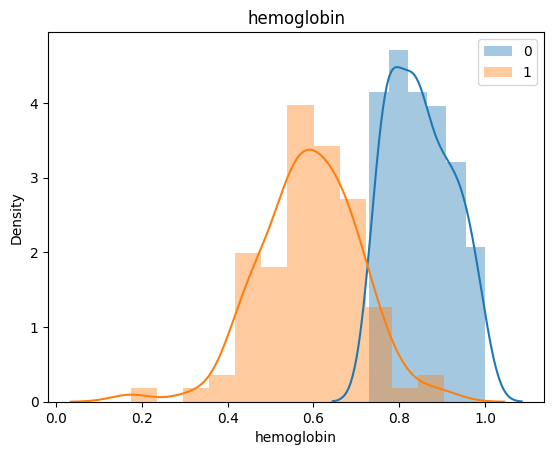

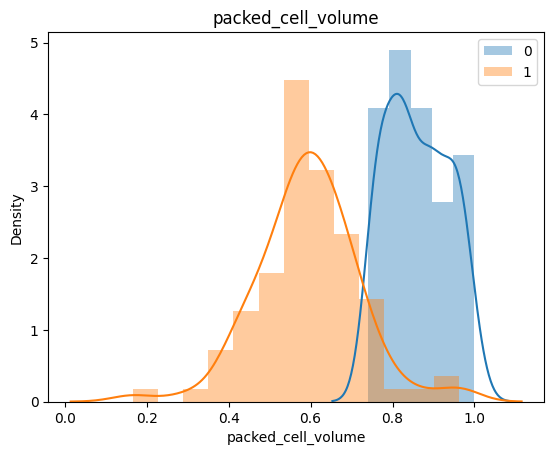

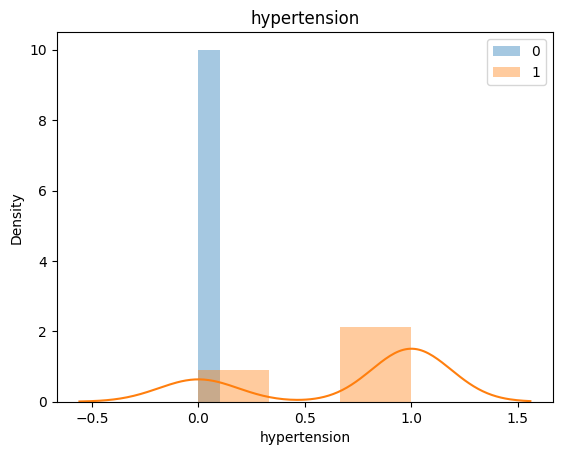

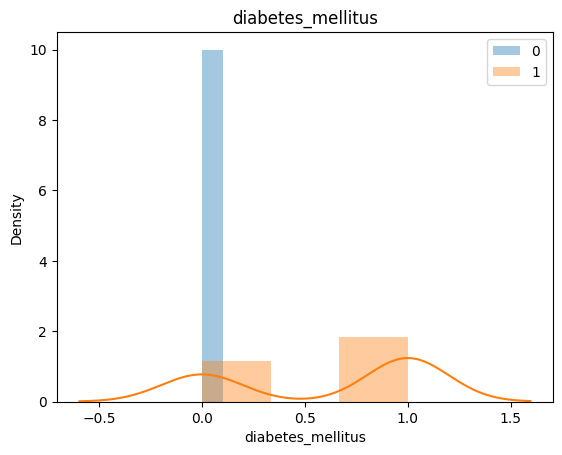

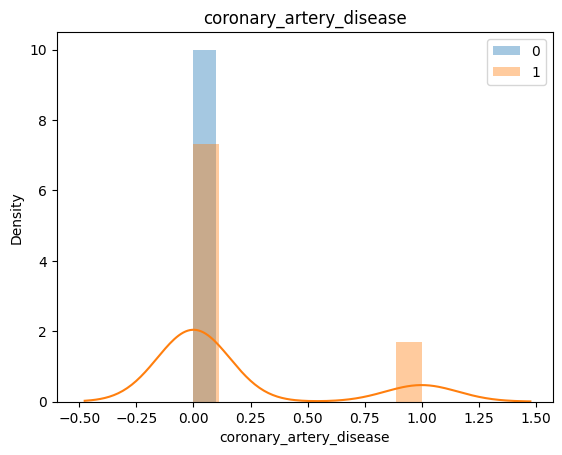

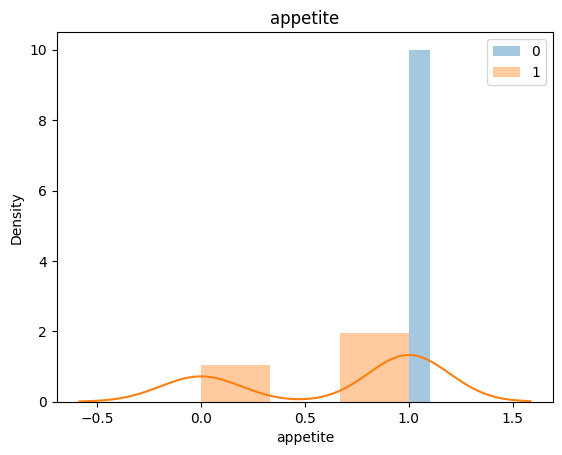

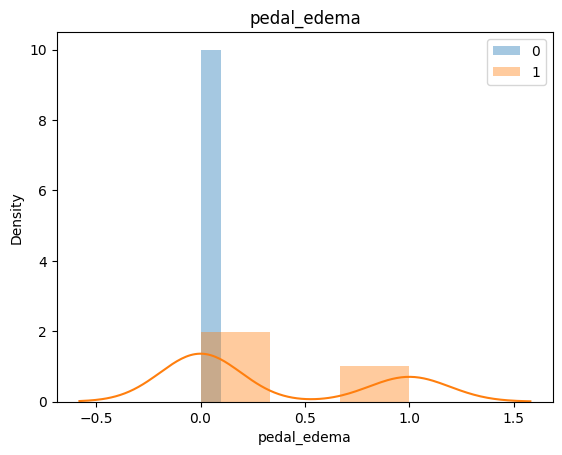

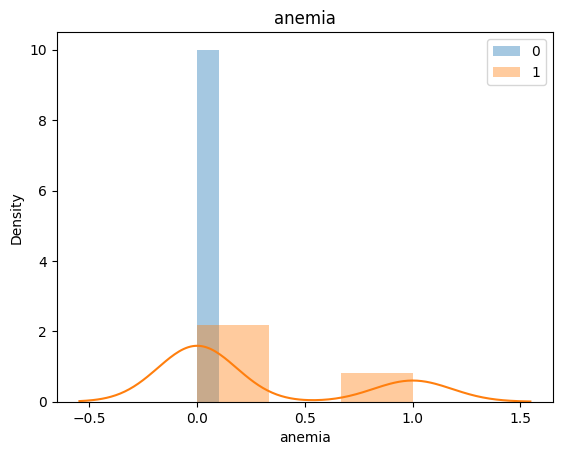

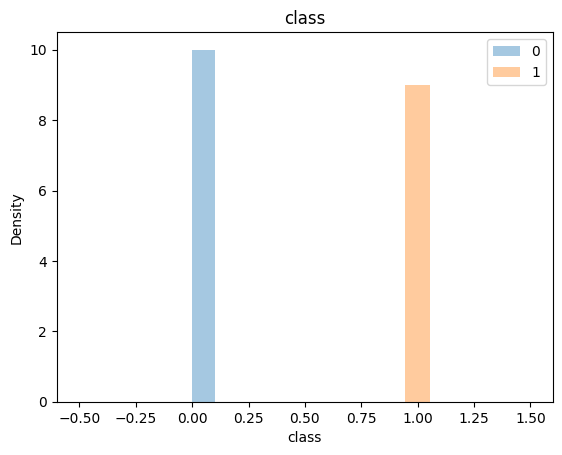

In [6]:
# graph distributions of every variable for class 0 and 1

for col in df.columns:
    sns.distplot(df[col][df['class'] == 0], label = '0')
    sns.distplot(df[col][df['class'] == 1], label = '1')
    plt.legend()
    plt.title(col)
    plt.show()


# Part 2.
#### Potential CKD Subtypes